<a href="https://colab.research.google.com/github/jafetimbre/verbose-projects/blob/master/infosec/mininet-dos-sim/analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

![DoS attack simulation diagram](https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/simulation_diagram.png "DoS attack simulation diagram")

For more information, check out the simulation code [here](https://github.com/jafetimbre/verbose-projects/blob/master/infosec/mininet-dos-sim/simulation.py)

We are analyzing the traffic after the ping request-reply phase (usual traffic + dos).

In [8]:
host_1 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h1-eth0.csv")
host_2 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h2-eth0.csv")
host_3 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h3-eth0.csv")

In [10]:
host_1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.0.0.2,10.0.0.1,TCP,7306,"60410 > 5001 [PSH, ACK] Seq=1 Ack=1 Win=83 L..."
1,2,0.000040,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=7241 Win=78 Len...
2,3,0.066453,10.0.0.2,10.0.0.1,TCP,10202,"60410 > 5001 [PSH, ACK] Seq=7241 Ack=1 Win=8..."
3,4,0.066478,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=17377 Win=75 Le...
4,5,0.145256,10.0.0.2,10.0.0.1,TCP,4410,"60410 > 5001 [PSH, ACK] Seq=17377 Ack=1 Win=..."


In [44]:
# forming the indexes as datetime for further analysis
host_1 = host_1.set_index(pd.DatetimeIndex(pd.to_datetime(host_1["Time"], unit="s")))
host_2 = host_2.set_index(pd.DatetimeIndex(pd.to_datetime(host_2["Time"], unit="s")))
host_3 = host_3.set_index(pd.DatetimeIndex(pd.to_datetime(host_3["Time"], unit="s")))

In [65]:
# Computing packet frequency with 1s window
h1_pkt_freq = host_1.resample('1S').count()["Time"]
h2_pkt_freq = host_2.resample('1S').count()["Time"]

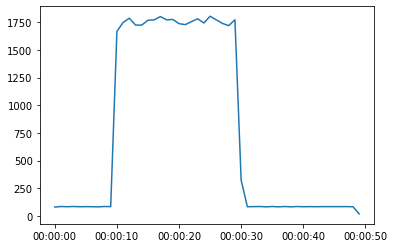

In [66]:
plt.plot(h1_pkt_freq)

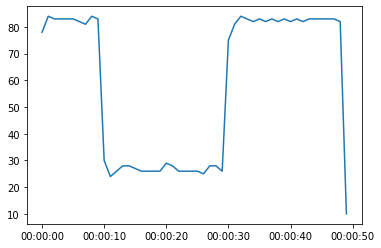

In [67]:
plt.plot(h2_pkt_freq)

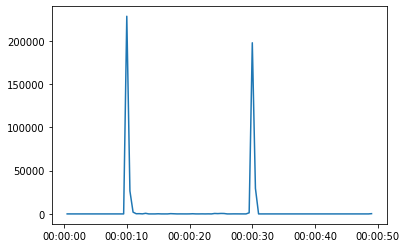

In [85]:
t = host_1["Time"].resample('500ms').count().rolling(2).var()
plt.plot(t)

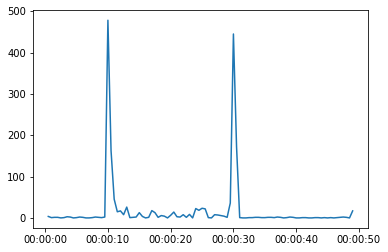

In [86]:
t = host_1["Time"].resample('500ms').count().rolling(2).std()
plt.plot(t)

In [ ]:
# TODO: filter source host 3 and analyse
